In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Carga y Limpieza de Datos

In [2]:
data_encuesta = pd.read_hdf(r'C:\Analitics Dev\DataCamp\Datasets\Exploratory Data Analysis\Behavioral Risk Factor Surveillance System.hdf5')

In [3]:
List_income = ['< 15k','< 15k','15k< >25k','15k< >25k','25k< >30k','30k< >50k','50k< >100k','50k< >100k',np.nan]
INCOME2 = sorted(np.array(data_encuesta['INCOME2'].unique()))
dt_Income= pd.DataFrame({
    'Id_Income2' : INCOME2,
    'Denom_Income' : List_income
})

In [4]:
List_age = ['18<>24','25<>29','30<>34','35<>39','40<>44','45<>49','50<>54','55<>59','60<>64','65<>69','70<>74','75<>79','80<>89',np.nan]
AGEG5YR = sorted(np.array(data_encuesta['_AGEG5YR'].unique()))
dt_Age= pd.DataFrame({
    'Id_Income2' : AGEG5YR,
    'Denom_Income' : List_age
})

In [5]:
data_encuesta.rename({'HTM4':'Altura','WTKG3':'Peso','_VEGESU1':'Veg_Consumidos','INCOME2':'Cat_Ingresos','_AGEG5YR':'Cat_Edad','AGE':'Edad'},axis=1,inplace=True)

In [6]:
data_encuesta.dropna(subset=['SEX'],inplace=True)

In [7]:
data_encuesta['Genero'] = np.where(data_encuesta['SEX']==1,"Masculino",np.where(data_encuesta['SEX']==2,"Femenino",np.nan))

In [8]:
data_encuesta.drop(['_HTMG10','SEX'],axis=1,inplace=True)

In [9]:
data_encuesta.head()

,Altura,Peso,Cat_Ingresos,_LLCPWT,Cat_Edad,Veg_Consumidos,Edad,Genero
96230,160.0,60.33,8.0,1398.525290,6.0,2.14,47.0,Femenino
244920,163.0,58.97,5.0,84.057503,13.0,3.14,89.5,Femenino
57312,163.0,72.57,8.0,390.248599,5.0,2.64,42.0,Femenino
32573,165.0,74.84,1.0,11566.705300,3.0,1.46,32.0,Femenino
355929,170.0,108.86,3.0,844.485450,3.0,1.81,32.0,Femenino


In [10]:
data_encuesta.shape

(99938, 8)

In [11]:
data_encuesta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99938 entries, 96230 to 379327
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Altura          95101 non-null  float64
 1   Peso            93363 non-null  float64
 2   Cat_Ingresos    83406 non-null  float64
 3   _LLCPWT         99938 non-null  float64
 4   Cat_Edad        98749 non-null  float64
 5   Veg_Consumidos  87667 non-null  float64
 6   Edad            98749 non-null  float64
 7   Genero          99938 non-null  object 
dtypes: float64(7), object(1)
memory usage: 6.9+ MB


#### EDA: Exploratoring Data Analysis

In [12]:
data_encuesta['Genero'].value_counts()

Femenino     51349
Masculino    48589
Name: Genero, dtype: int64

##### Descripción de Altura

In [13]:
data_encuesta.groupby('Genero')['Edad'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Femenino,50696.0,48.649243,19.222262,21.0,32.0,47.0,62.0,89.5
Masculino,48053.0,46.736759,18.446782,21.0,32.0,47.0,62.0,89.5


In [14]:
data_encuesta.groupby('Genero')['Altura'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Femenino,48620.0,162.968531,7.582218,91.0,157.0,163.0,168.0,224.0
Masculino,46481.0,177.538048,8.350154,103.0,173.0,178.0,183.0,226.0


In [15]:
data_encuesta.reset_index(inplace=True)

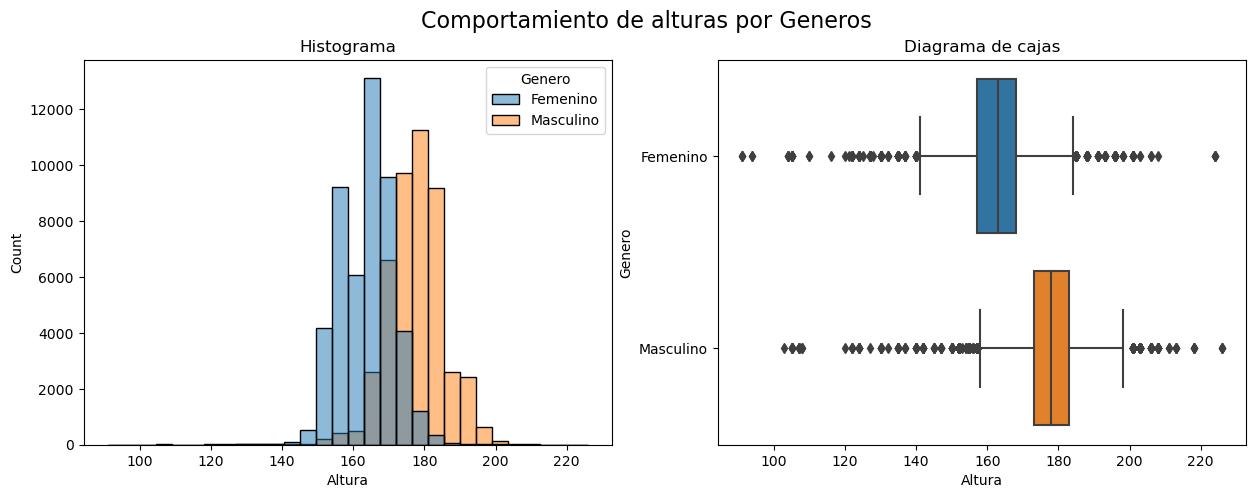

In [16]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=data_encuesta,x='Altura',hue='Genero',bins=30,ax=ax[0])
sns.boxplot(data=data_encuesta,x='Altura',y='Genero',ax=ax[1])
fig.suptitle('Comportamiento de alturas por Generos', fontsize=16)
ax[0].set_title('Histograma')
ax[1].set_title('Diagrama de cajas')
plt.show()

In [17]:
#Agrupacion para el promedio de altura
altura_edades = data_encuesta.groupby(['Genero','Edad'])['Altura'].mean()
altura_edades = altura_edades.reset_index()

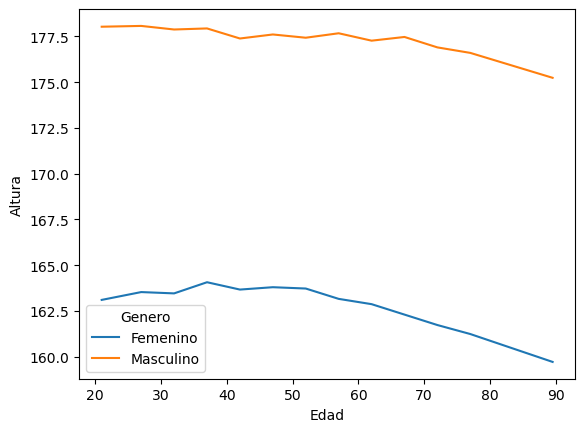

In [18]:
sns.lineplot(data=altura_edades,x='Edad',y='Altura',hue='Genero')
plt.show()

In [19]:
altura_edades.head()

,Genero,Edad,Altura
0,Femenino,21.0,163.101967
1,Femenino,27.0,163.529750
2,Femenino,32.0,163.457875
3,Femenino,37.0,164.067407
4,Femenino,42.0,163.666579


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
altura_edades_femenino = altura_edades.query('Genero=="Femenino"')
altura_edades_masculino = altura_edades.query('Genero=="Masculino"')

In [22]:
#Regresion lineal - Masculinos
altura_m = np.array(altura_edades_masculino['Altura']).reshape(-1, 1)
edad_m = np.array(altura_edades_masculino['Edad']).reshape(-1, 1)
lr_m = LinearRegression()
lr_m = lr_m.fit(edad_m,altura_m)
altura_m_pred = lr_m.predict(edad_m)
print(lr_m.coef_,lr_m.intercept_)

[[-0.03217368]] [179.03615352]


In [23]:
#Regresion lineal - Femeninos
altura_f = np.array(altura_edades_femenino['Altura']).reshape(-1, 1)
edad_f = np.array(altura_edades_femenino['Edad']).reshape(-1, 1)
lr_f = LinearRegression()
lr_f = lr_m.fit(edad_f,altura_f)
altura_f_pred = lr_m.predict(edad_m)
print(lr_f.coef_,lr_f.intercept_)

[[-0.04981498]] [165.41108126]


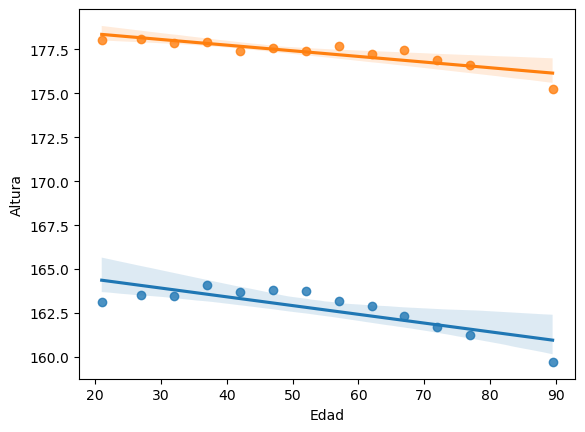

In [24]:
sns.regplot(x='Edad',y='Altura',data= altura_edades.query('Genero=="Femenino"'))
sns.regplot(x='Edad',y='Altura',data= altura_edades.query('Genero=="Masculino"'))
plt.show()

In [25]:
#Funcion para el calculo de la pendiente
def pendiente (x,y):
    lr = LinearRegression()
    lr = lr.fit(x,y)
    pendiente = lr.coef_
    return pendiente

In [26]:
len(altura_f)

13

In [27]:
pendiente_altura_m = []
for i in range(11):
    x = edad_m[i:]
    y = altura_m[i:]
    p = pendiente(x,y)
    pendiente_altura_m.append(p[0][0])

In [28]:
pendiente_altura_f = []
for i in range(11):
    x = edad_f[i:]
    y = altura_f[i:]
    p = pendiente(x,y)
    pendiente_altura_f.append(p[0][0])

In [29]:
pendiente_altura_f

[-0.04981497800353781,
 -0.060485733537009784,
 -0.06958257261467544,
 -0.08146034123313381,
 -0.08777373192408047,
 -0.09857254717101634,
 -0.10586468721276128,
 -0.10814264455954785,
 -0.11416895925467374,
 -0.11480951837415913,
 -0.11646447753978814]